In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [7]:
data['target'] = iris.target

In [8]:
data['flower_name'] =data.target.apply(lambda x: iris.target_names[x])

In [9]:
data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


In [10]:
data.tail(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [11]:
df0 = data[data['target']==0]

In [12]:
df1 = data[data['target']==1]
df2 = data[data['target']==2]

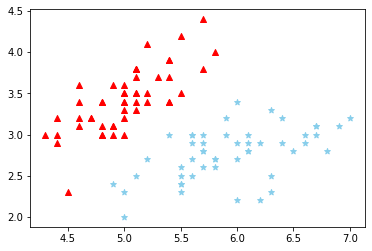

In [13]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker='^',color='r')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='*',color='skyblue')
# plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],marker='+',color='g')

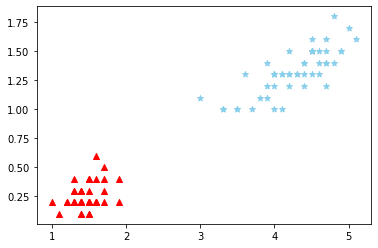

In [14]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],marker='^',color='r')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='*',color='skyblue')
# plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],marker='.',color='g')


In [15]:
X_ = data.drop(['target','flower_name'],axis=1)

In [16]:
Y_ = data.target

In [17]:
# Y_

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_,Y_,test_size=.3,random_state=42)

In [20]:
model = SVC(C=1,kernel='linear',gamma=10)

In [21]:
model.fit(X_train,y_train)

SVC(C=1, gamma=10, kernel='linear')

In [22]:
model.score(X_test,y_test)

1.0

In [23]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [24]:
prediction = model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<AxesSubplot:>

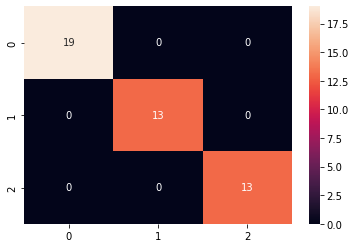

In [26]:
cm = confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True)